In [13]:
# Sample Exercise (Finding The V-Beats in signal)

In [14]:
# (Premature ventricular contraction) 
# [https://en.wikipedia.org/wiki/Premature_ventricular_contraction]
# Features of V beats: peak-to-peak intervals, peak amplitudes, peak inverted etc...

In [1]:
#Supporting functions:
# Imports
%matplotlib inline
import wfdb
import matplotlib.pyplot as plt
def read_ecg(file_path):
    """
    output: ecg files, get signal, annotated peaks, annotated types
    input: ecg file id
    """
    signals, fields = wfdb.rdsamp(file_path)
    annotation = wfdb.rdann(file_path, 'atr')
    ecg_sig = signals[:,0]
    ecg_type = annotation.symbol
    ecg_peak = annotation.sample
    return ecg_sig, ecg_type, ecg_peak

def plot_ecg(ecg_sig, ecg_type, ecg_peak, title='Fig: Train', npeak=10, len_sig=3000):
    """
    demo plot ecg signal with annotated peaks, annotated types
    """
    _, ax = plt.subplots()
    for i in range(0, npeak):
        ax.annotate(ecg_type[i], xy=(ecg_peak[i], -2))
    ax.plot(ecg_sig[0:len_sig])
    ax.plot(ecg_peak[0:npeak], ecg_sig[ecg_peak[0:npeak]], '*')
    ax.set_title(title)

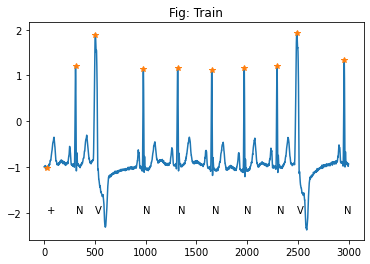

In [2]:
#What's included in the training database? 
#1. The training database contains a group of ECG signals and annotations: 
#2. In each annotation, the type of each beat is annotated on its peak (N, V, ...), 
#   For example: 
training_file_path = './database/train/a4'
ecg_sig, ecg_type, ecg_peak = read_ecg(training_file_path)
plot_ecg(ecg_sig, ecg_type, ecg_peak)

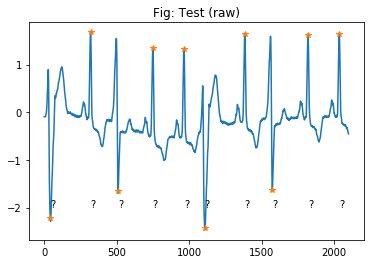

In [17]:
#What's included in the testing database? 
#1. The testing database contains a group of ECG signals. However,  
#2. Type of each beat is unknown (?, ?, ...). For example: 
testing_file_path = './database/test/b2'
ecg_sig, ecg_type, ecg_peak = read_ecg(testing_file_path)
plot_ecg(ecg_sig, ecg_type, ecg_peak, title='Fig: Test (raw)', len_sig=2100)

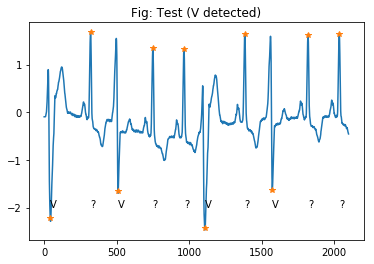

In [18]:
#Requirement: 
#1. develop an algorithm which identify all possible 'V' beats. 

#```
#Hint: use train a machine learning model to predict (e.g. scikit-learn library)
#a. segmentation based on peaks.
#b. feature extraction for each segment.
#c. initialize a classifier.
#d. train, evaluate, test.
#```

#2. The indentified beat shall be assigned as 'V'. For example:  
ecg_type[0] = 'V' #assume the algorithm detected
ecg_type[2] = 'V' #assume the algorithm detected
ecg_type[5] = 'V' #assume the algorithm detected
ecg_type[7] = 'V' #assume the algorithm detected
plot_ecg(ecg_sig, ecg_type, ecg_peak,title='Fig: Test (V detected)', len_sig=2100)

In [19]:
# Write to testing file
wfdb.wrann('b2', 'test', ecg_peak, ecg_type, write_dir='./database/test/')